In [1]:
import sklearn.datasets as ds
import pandas as pd
import matplotlib.pyplot as plt

iris = ds.load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['label']= iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


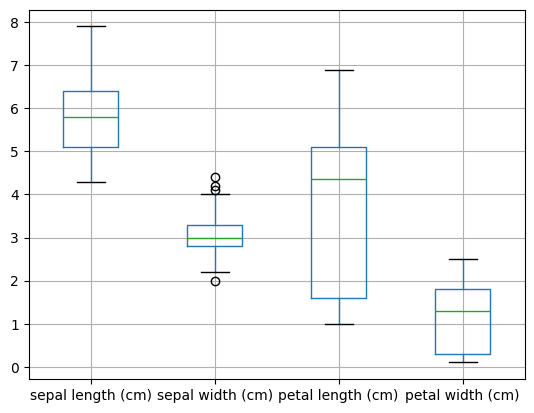

In [2]:
#Show boxplots of all feature values (every column except "label")
#boxplot = df.iloc[:,:-1].boxplot(figsize=(15, 10))
boxplot = df.iloc[:,:-1].boxplot()
plt.show()


#Analyze the different value ranges of all 4 features in the diagram!

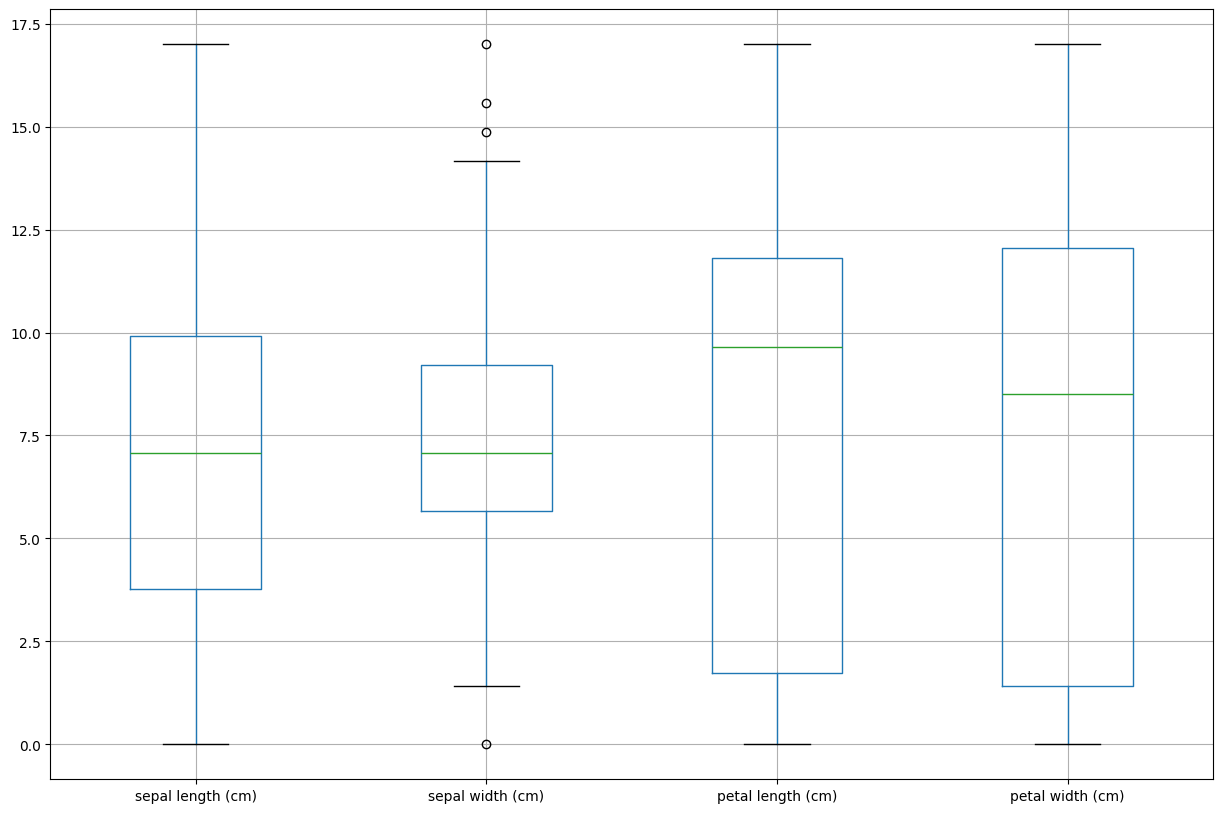

In [3]:
#Use an adequate feature scaling function to bring all feature values into the range [0,17]
#Hint: you will need to import the preprocessing package first
from sklearn.preprocessing import MinMaxScaler

#initialize your scaler
minmax_scaler = MinMaxScaler(feature_range=(0,17))
#fit scaler to feature columns (all but the last one)
minmax_scaler.fit(df.iloc[:,:-1])

#transform feature columns to range (0,17)
scaled_features=minmax_scaler.transform(df.iloc[:,:-1])
#print(scaled_features)

#create a new data frame with the scaled features and the original label
df_scaled=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_scaled['label']=df['label']

#boxplot the scaled features
boxplot = df_scaled.iloc[:,:-1].boxplot(figsize=(15, 10))
plt.show()

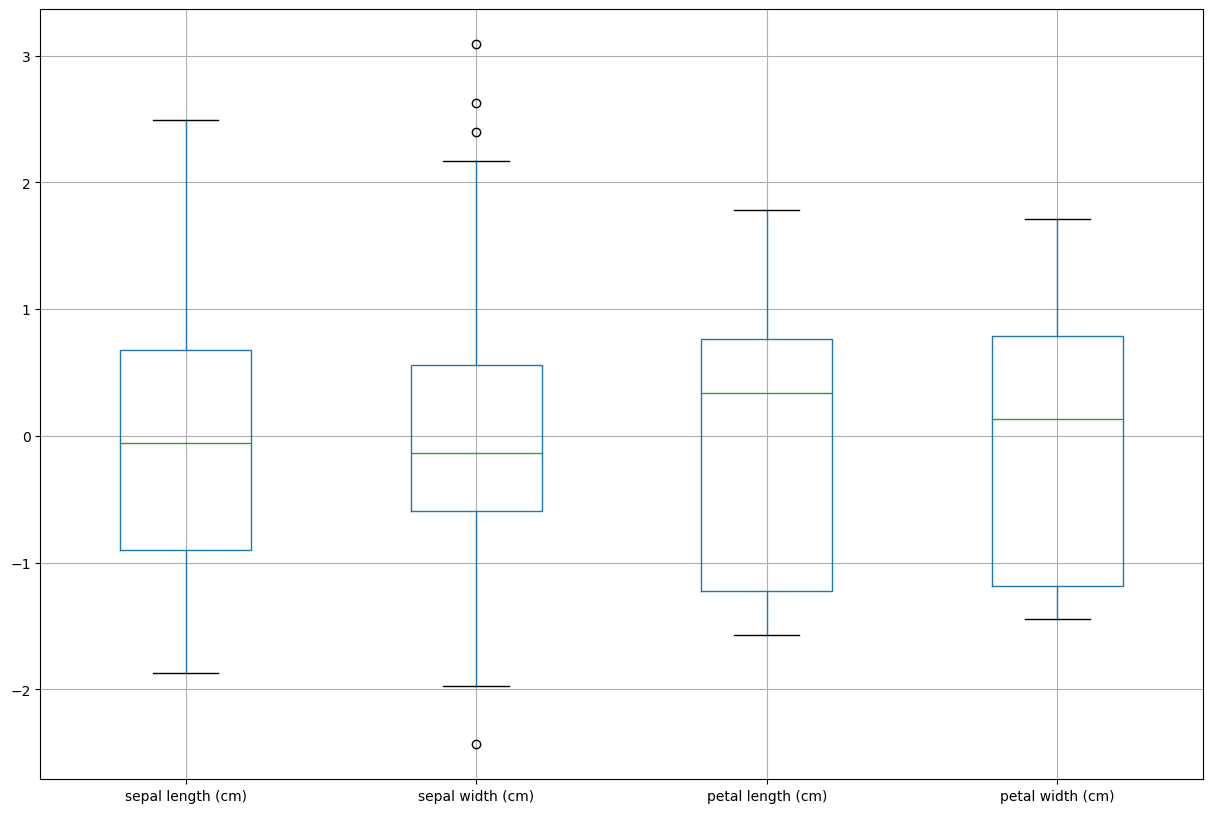

In [12]:
#Return to your original data frame (without scaling)

#Now use a different scaler to rescale the al_co values to have a specific mean (=0) and a specific standard deviation (=1)
from sklearn.preprocessing import StandardScaler

#initialize your scaler
std_scaler = StandardScaler()
#fit scaler to feature columns (all but the last one)
std_scaler.fit(df.iloc[:,:-1])

#scale features to to have a mean=0 and a standard deviation=1
scaled_features=std_scaler.transform(df.iloc[:,:-1])

#create a new data frame with the scaled features and the original label
df_scaled2=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_scaled2['label']=df['label']

#boxplot the scaled features
boxplot = df_scaled2.iloc[:,:-1].boxplot(figsize=(15, 10))
plt.show()
#why is the green line in the boxplots <> 0 ?

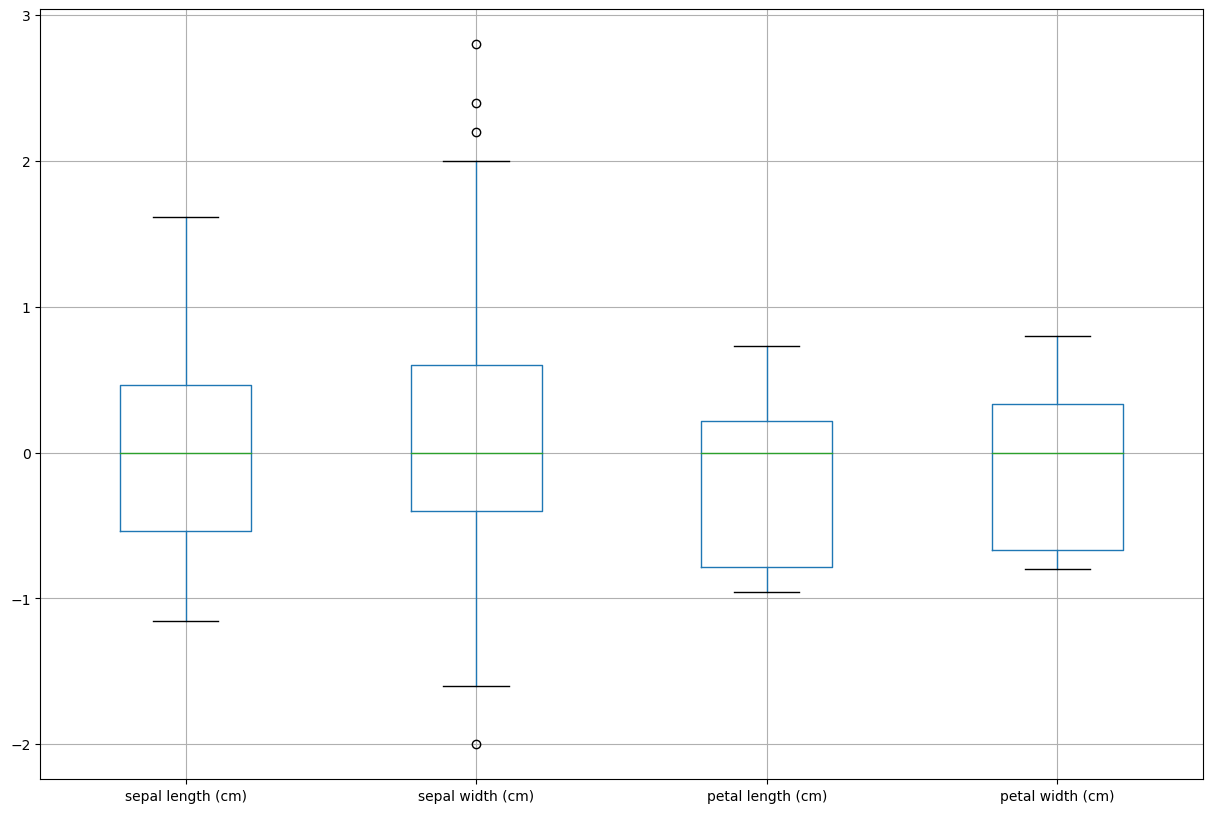

In [13]:
#Apply Robust Scaler to your dataset
from sklearn.preprocessing import RobustScaler

#initialize your scaler
rob_scaler = RobustScaler()
#fit scaler to feature columns (all but the last one)
rob_scaler.fit(df.iloc[:,:-1])

#scale features to to have a mean=0 and a standard deviation=1
scaled_features=rob_scaler.transform(df.iloc[:,:-1])

#create a new data frame with the scaled features and the original label
df_scaled3=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_scaled3['label']=df['label']

#boxplot the scaled features
boxplot = df_scaled3.iloc[:,:-1].boxplot(figsize=(15, 10))
plt.show()

#Compare results to the other two scalers!